<a href="https://colab.research.google.com/github/BrianMohamadSafiudin/PCVK_Ganjil_2023/blob/main/TugasAkhirPCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anggota Kelompok 3 :**

- 2141720133 - Brian Mohamad Safiudin
- 2141720059 - Febryan Rizki Hidayatullah
- 2141720140 - M. Rizky Mafazan

---
# **Trained Model CNN**
---
- Google Drive ipynb: https://drive.google.com/file/d/1_ZWOhOdOm3O32Xv-LyK6RVZ0-uW72b7y/view?usp=sharing
- Google Drive Model: https://drive.google.com/file/d/1-kL-FOGGpyoS9-1FrAh8Yh4Uy7b8sOeQ/view?usp=sharing

---
# **Tugas Akhir - OCR KTM**
---
- Tidak menggunakan tesseract atau library untuk recognized, dapat diganti menggunakan CNN.
1. Preprocessing
2. Ekstraksi fitur
3. Deteksi object
4. Pengolahan dengan CNN
5. Teks hasil OCR

---
## **1. Preprocessing**
---

In [1]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import numpy as np
import imutils
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

### Load Model

In [3]:
model = load_model("/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/modeltrainedbrianfebryanfafan.h5")
# check summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

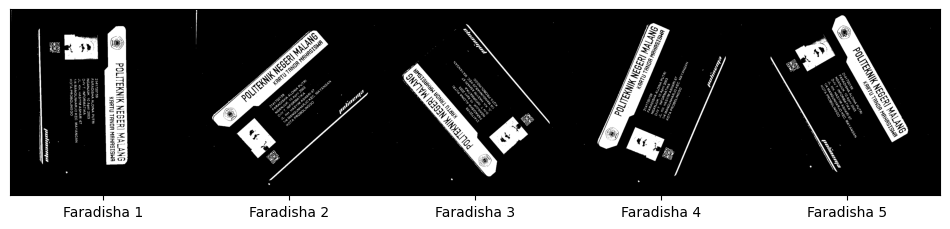

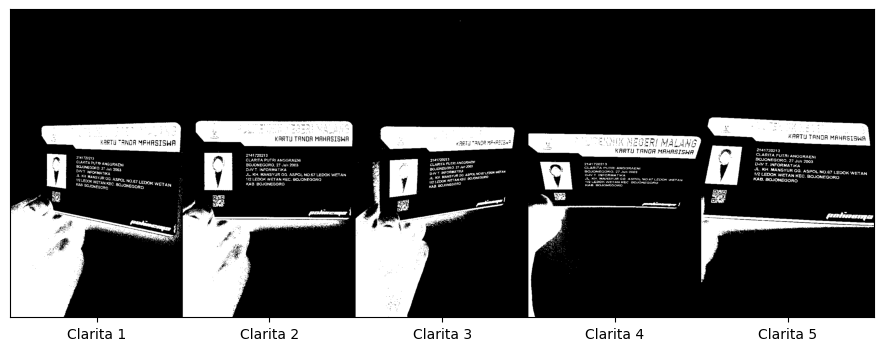

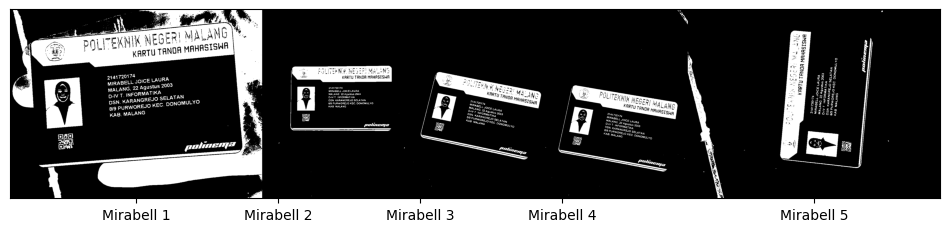

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert image to binary using Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalize image
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

# List of image paths
image_paths = [
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_1_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_2_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_3_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_4_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_5_FARADISHAALDINAPUTRI.jpg',

    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_1_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_2_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_3_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_4_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_5_CLARITAPUTRIANGGRAENI.jpg',

    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_1_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_2_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_3_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_4_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_5_MirabellJoiceLaura.jpg'
]

# Number of images to display in each row
images_per_row = 5

# Common height for resizing
common_height = 1000  # Adjust as needed

# Process and display images in a grid
for i in range(0, len(image_paths), images_per_row):
    # Read and preprocess images for the current row
    images_row = [preprocess(cv2.imread(img_path)) for img_path in image_paths[i:i+images_per_row]]

    # Resize images to a common height while maintaining aspect ratio
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images_row]
    heights = [int(common_height) for _ in range(len(images_row))]
    widths = [int(common_height * aspect_ratio) for aspect_ratio in aspect_ratios]

    images_row_resized = [cv2.resize(img, (width, height)) for img, width, height in zip(images_row, widths, heights)]

    # Concatenate images horizontally
    row_image = np.concatenate(images_row_resized, axis=1)

    # Display the row of images with titles and a ruler
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.imshow(row_image, cmap='gray')

    # Set ticks and labels
    ticks = np.cumsum(widths) - widths[0] / 2
    ax.set_xticks(ticks)
    ax.set_yticks([])  # No ticks on the y-axis
    if i < 5:
        ax.set_xticklabels([f'Faradisha {i+1}' for i in range(len(ticks))])
    elif 5 <= i < 10:
        ax.set_xticklabels([f'Clarita {i+1}' for i in range(len(ticks))])
    else:
        ax.set_xticklabels([f'Mirabell {i+1}' for i in range(len(ticks))])

    # Show the plot
    plt.show()


---
## **2. Ekstraksi Fitur**
---

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert image to binary using Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalize image
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

def extract_features(image):
    # Convert image to flattened array
    arr = image.reshape((image.shape[0] * image.shape[1], 1))
    # Calculate features
    features = np.array([np.sum(arr), np.var(arr), np.std(arr)])
    return features

# List of image paths
image_paths = [
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_1_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_2_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_3_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_4_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_5_FARADISHAALDINAPUTRI.jpg',

    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_1_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_2_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_3_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_4_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_5_CLARITAPUTRIANGGRAENI.jpg',

    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_1_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_2_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_3_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_4_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_5_MirabellJoiceLaura.jpg'
]

# Process
for i in range(0, len(image_paths), images_per_row):
    # Extract features for each image
    for j, img in enumerate(images_row):
        features = extract_features(img)
        print(f'Image {i + j + 1} Features: {features}')


Image 1 Features: [5.69832400e+06 2.29074935e-01 4.78617733e-01]
Image 2 Features: [1.26448900e+06 7.26351922e-02 2.69509169e-01]
Image 3 Features: [1.43911400e+06 8.16888041e-02 2.85812533e-01]
Image 4 Features: [1.44541400e+06 8.20110016e-02 2.86375630e-01]
Image 5 Features: [1.42176400e+06 8.07998868e-02 2.84253209e-01]
Image 6 Features: [5.69832400e+06 2.29074935e-01 4.78617733e-01]
Image 7 Features: [1.26448900e+06 7.26351922e-02 2.69509169e-01]
Image 8 Features: [1.43911400e+06 8.16888041e-02 2.85812533e-01]
Image 9 Features: [1.44541400e+06 8.20110016e-02 2.86375630e-01]
Image 10 Features: [1.42176400e+06 8.07998868e-02 2.84253209e-01]
Image 11 Features: [5.69832400e+06 2.29074935e-01 4.78617733e-01]
Image 12 Features: [1.26448900e+06 7.26351922e-02 2.69509169e-01]
Image 13 Features: [1.43911400e+06 8.16888041e-02 2.85812533e-01]
Image 14 Features: [1.44541400e+06 8.20110016e-02 2.86375630e-01]
Image 15 Features: [1.42176400e+06 8.07998868e-02 2.84253209e-01]


---
## **3. Deteksi Object dan Contour**
---

<ipython-input-6-7bb4426e6bbb>:86: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, images_per_row, j + 1 + images_per_row)


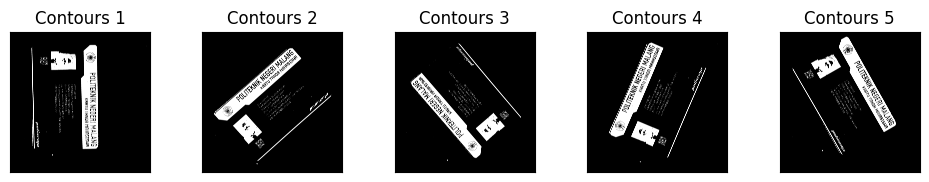

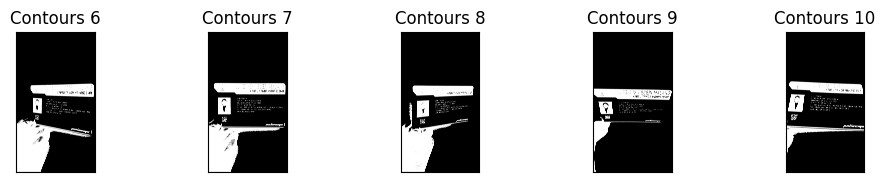

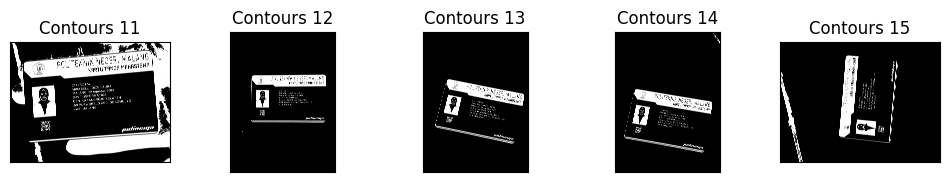

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert image to binary using Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalize image
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

def extract_features(image):
    # Convert image to flattened array
    arr = image.reshape((image.shape[0] * image.shape[1], 1))
    # Calculate features
    features = np.array([np.sum(arr), np.var(arr), np.std(arr)])
    return features

def detect_objects(image):
    # Find contours in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the image
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

    return image_with_contours, contours

# List of image paths
image_paths = [
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_1_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_2_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_3_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_4_FARADISHAALDINAPUTRI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3I_2141720159_5_FARADISHAALDINAPUTRI.jpg',

    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_1_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_2_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_3_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_4_CLARITAPUTRIANGGRAENI.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3G_2141720213_5_CLARITAPUTRIANGGRAENI.jpg',

    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_1_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_2_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_3_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_4_MirabellJoiceLaura.jpg',
    '/content/drive/MyDrive/PCVK/TugasAkhirPCVK_Kelompok3_BrianFebryanFafan/DatasetKelompok2/3D_2141720174_5_MirabellJoiceLaura.jpg'
]

# Number of images to display in each row
images_per_row = 5

# Common height for resizing
common_height = 400  # Adjust as needed

# Process and display images in a grid
for i in range(0, len(image_paths), images_per_row):
    # Read and preprocess images for the current row
    images_row = [preprocess(cv2.imread(img_path)) for img_path in image_paths[i:i+images_per_row]]

    # Resize images to a common height while maintaining aspect ratio
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images_row]
    heights = [int(common_height) for _ in range(len(images_row))]
    widths = [int(common_height * aspect_ratio) for aspect_ratio in aspect_ratios]

    images_row_resized = [cv2.resize(img, (width, height)) for img, width, height in zip(images_row, widths, heights)]

    # Concatenate images horizontally
    row_image = np.concatenate(images_row_resized, axis=1)

    # Display the row of images with titles and a ruler
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.imshow(row_image, cmap='gray')

    # Set ticks and labels
    ticks = np.cumsum(widths) - widths[0] / 2
    ax.set_xticks(ticks)
    ax.set_yticks([])  # No ticks on the y-axis
    ax.set_xticklabels([f'Image {i+1}' for i in range(len(ticks))])

    # Detect objects and display contours
    for j, img in enumerate(images_row):
        image_with_contours, contours = detect_objects(img)
        ax = plt.subplot(2, images_per_row, j + 1 + images_per_row)
        ax.imshow(image_with_contours, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Contours {i + j + 1}')

    # Show the plot
    plt.show()
